In [518]:
#10-2 IRIS데이터를 이용한 오토인코더 구현
import numpy as np
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv1D, Conv1DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


# Split Train, Test Dataset From All Dataset
def split_train_test(X, y): # (allData, 150, 100)
    total_length=150; train_length=120; feature_length=4;
    
    # dataset과 같은 차원의 zeros ndarray 생성
    all_idx_arr = []
    X_train = np.zeros(shape=[train_length, feature_length]) # train_data초기화
    y_train = np.zeros(shape=[train_length, 3])
    
    X_test = np.zeros(shape=[total_length - train_length, feature_length]) # test_data초기화
    y_test = np.zeros(shape=[total_length - train_length, 3])
    
    
    for i in range(0, total_length):
        all_idx_arr.append(i)
    
    
    train_idx_arr = np.random.choice(total_length, train_length, replace=False)
    test_idx_arr = list(set(all_idx_arr) - set(train_idx_arr))
    
    j=0;
    for i in train_idx_arr:
        X_train[j] = X[i]
        if y[i] == 0:
            y_train[j] = np.array([1,0,0])
        elif y[i] == 1:
            y_train[j] = np.array([0,1,0])
        elif y[i] == 2:
            y_train[j] = np.array([0,0,1])
        
        j+=1
    
    j=0
    for i in test_idx_arr:
        X_test[j] = X[i]
        if y[i] == 0:
            y_test[j] = np.array([1,0,0])
        elif y[i] == 1:
            y_test[j] = np.array([0,1,0])
        elif y[i] == 2:
            y_test[j] = np.array([0,0,1])
            
        j+=1
        
    return X_train, y_train, X_test, y_test

#IRIS 데이터 Load
from sklearn import datasets
allData = datasets.load_iris()
X = allData.data
y = allData.target

(X_train, y_train, X_test, y_test) = split_train_test(X, y)


In [593]:
#### 인코더 설계
encoder_input = Input(shape=(4,))
x = Dense(64, activation='relu')(encoder_input)
x = Dense(64, activation='relu')(x)
x = Dense(3, activation='softmax')(x)
x = Flatten()(x)
zdim = 2
encoder_output = Dense(zdim)(x)
encoder = Model(encoder_input, encoder_output);

# encoder.compile(optimizer='Adam', loss='mse', metrics=['acc'])
# history = encoder.fit(X_train, y_train, epochs=100, validation_split=0.2)

#### 디코더 설계
decoder_input = Input(shape=(zdim,))
x = Dense(3)(decoder_input)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(4, activation='relu')(x)

decoder_output = x
decoder = Model(decoder_input, decoder_output)

model_input = encoder_input
model_output = decoder(encoder_output)

#### 오토인코더 모델 생성
model = Model(model_input, model_output) 

#### 오토인코더 학습
model.compile(optimizer='Adam', loss='mse')
model.fit(X_train, X_train, epochs=100, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 0s 96ms/step - loss: 15.3762 - val_loss: 17.4481
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 15.1358 - val_loss: 17.0924
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 14.8065 - val_loss: 16.6915
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 14.4422 - val_loss: 16.3049
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 14.0925 - val_loss: 15.9240
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 13.7445 - val_loss: 15.5291
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 13.3856 - val_loss: 15.1322
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 13.0196 - val_loss: 14.7332
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 12.6573 - val_loss: 14.3467
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 12.3099 - val_loss: 13.9526

2/2 [==============================] - 0s 10ms/step - loss: 1.1190 - val_loss: 1.1834
Epoch 84/100
2/2 [==============================] - 0s 11ms/step - loss: 1.1074 - val_loss: 1.1772
Epoch 85/100
2/2 [==============================] - 0s 11ms/step - loss: 1.1009 - val_loss: 1.1734
Epoch 86/100
2/2 [==============================] - 0s 10ms/step - loss: 1.0932 - val_loss: 1.1541
Epoch 87/100
2/2 [==============================] - 0s 11ms/step - loss: 1.0854 - val_loss: 1.1307
Epoch 88/100
2/2 [==============================] - 0s 10ms/step - loss: 1.0800 - val_loss: 1.1181
Epoch 89/100
2/2 [==============================] - 0s 11ms/step - loss: 1.0758 - val_loss: 1.1144
Epoch 90/100
2/2 [==============================] - 0s 10ms/step - loss: 1.0716 - val_loss: 1.1159
Epoch 91/100
2/2 [==============================] - 0s 11ms/step - loss: 1.0678 - val_loss: 1.1189
Epoch 92/100
2/2 [==============================] - 0s 11ms/step - loss: 1.0660 - val_loss: 1.1146
Epoch 93/100
2/2 [=====

In [594]:
#### X_test를 복원하는 예측 실험
res = model.predict(X_test)
print(X_test, y_test)
print(res)

[[5.1 3.5 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [4.6 3.4 1.4 0.3]
 [6.1 2.6 5.6 1.4]
 [6.7 3.1 5.6 2.4]
 [5.8 2.7 5.1 1.9]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [6.3 2.5 5.  1.9]
 [5.  3.4 1.6 0.4]
 [5.2 3.4 1.4 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.7 2.8 4.5 1.3]
 [6.6 2.9 4.6 1.3]
 [6.1 2.9 4.7 1.4]
 [5.6 2.9 3.6 1.3]
 [5.8 2.7 4.1 1. ]
 [6.1 2.8 4.  1.3]
 [6.3 2.5 4.9 1.5]
 [6.3 2.3 4.4 1.3]
 [5.5 2.5 4.  1.3]
 [5.7 3.  4.2 1.2]
 [5.8 2.7 5.1 1.9]
 [7.2 3.6 6.1 2.5]
 [6.5 3.2 5.1 2. ]
 [7.7 3.8 6.7 2.2]
 [6.9 3.2 5.7 2.3]
 [7.2 3.2 6.  1.8]] [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[4.4866505 2.3040404 3.0073938 0.       ]
 [4.532284  2.326596  3.0

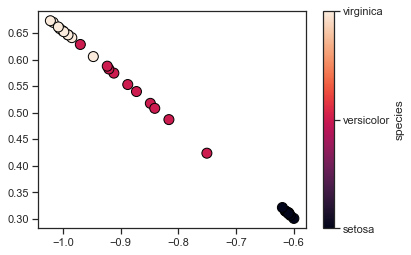

In [654]:
#### 2차원 공간에 뿌려 Manifold 확인
z = encoder.predict(X_test)

A = np.array([1.,0.,0.])
B = np.array([0.,1.,0.])
C = np.array([0.,0.,1.])

origin_y_test = []
for i in range(0,len(y_test)):
    if np.array_equal(A, y_test[i]):
        origin_y_test.append(0)
    elif np.array_equal(B, y_test[i]):
        origin_y_test.append(1)
    else:
        origin_y_test.append(2)
        

plt.scatter(z[:,0], z[:,1], s=100, alpha=1, c=origin_y_test, edgecolors='black')

cb=plt.colorbar(label='species')
cb.set_ticks([0,1,2])
cb.set_ticklabels(["setosa","versicolor","virginica"])
plt.show()

[0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2]

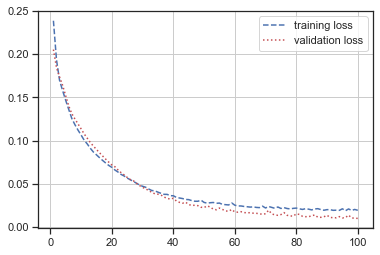

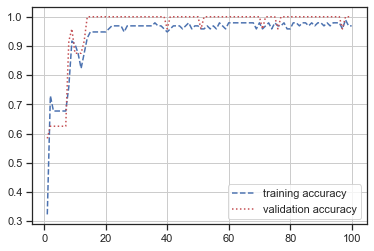

In [525]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()

In [562]:
# y_test
res = model.evaluate(X_test, y_test)
print(res)

1/1 - 0s - loss: 0.0119 - acc: 1.0000
[0.0119012501090765, 1.0]
